In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
import seaborn as sns

In [4]:
# from sklearn import cluster
# from sklearn import metrics
# from sklearn.metrics import 
# matplotlib.style.use('ggplot') 

In [47]:
pd.options.display.max_columns=50

In [48]:
cfe = pd.read_csv('../data/covid_fire_earthquake_summary.csv')
cfe.head()

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recoverd,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_capita,covid_confirmed_per_capita,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score
0,6001.0,Alameda,California,2020-10-17 04:24:12,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,0.000263,0.013407,0.013145,3,0,4,0,0
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,0.002657,0.002657,0,0,0,0,0
2,6005.0,Amador,California,2020-10-17 04:24:12,38.445831,-120.656960,309,16,0,293.0,777.319380,5.177994,39752,0.000402,0.007773,0.007371,2,0,2,0,0
3,6007.0,Butte,California,2020-10-17 04:24:12,39.667278,-121.600525,3000,50,0,2950.0,1368.700556,1.666667,219186,0.000228,0.013687,0.013459,9,1,11,0,0
4,6009.0,Calaveras,California,2020-10-17 04:24:12,38.205371,-120.552913,331,16,0,315.0,721.054351,4.833837,45905,0.000349,0.007211,0.006862,3,0,3,0,0


In [6]:
cfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fips                            58 non-null     float64
 1   county                          58 non-null     object 
 2   province_state                  58 non-null     object 
 3   covid_last_update               58 non-null     object 
 4   county_latitude                 58 non-null     float64
 5   county_longitudue               58 non-null     float64
 6   covid_confirmed                 58 non-null     int64  
 7   covid_death                     58 non-null     int64  
 8   covid_recoverd                  58 non-null     int64  
 9   covid_active                    58 non-null     float64
 10  covid_indidence_rate            58 non-null     float64
 11  covid_case_fatality_ratio       58 non-null     float64
 12  county_population               58 non

In [7]:
cfe.columns

Index(['fips', 'county', 'province_state', 'covid_last_update',
       'county_latitude', 'county_longitudue', 'covid_confirmed',
       'covid_death', 'covid_recoverd', 'covid_active', 'covid_indidence_rate',
       'covid_case_fatality_ratio', 'county_population',
       'covid_death_per_capita', 'covid_confirmed_per_capita',
       'covid_active_cases_per_capita', 'fires_per_county_in_2020',
       'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score'],
      dtype='object')

## \#Keeping only numeric columns

In [8]:
X = cfe.drop(columns = ['fips', 'county', 'province_state', 'covid_last_update'])

## \#Scaling

In [9]:
ss = StandardScaler()
X_sc = ss.fit_transform(X)

## \#KMeans

In [10]:
def optimize_kmeans(krange, scaled_X):
    
    max_score= -1
    
    for i in range(2,krange):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(scaled_X)
        score = silhouette_score(scaled_X, kmeans.labels_)
        if score > max_score:
            max_score = score
            k = i    
    print(f'StandardScaler silhouette score: {max_score} for optimal k of {k}')

In [11]:
optimize_kmeans(10, X_sc)

StandardScaler silhouette score: 0.42945415594366265 for optimal k of 2


In [18]:
def kmeans_range(krange, scaled_X):
    
    for i in range(2,krange):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(scaled_X)
        score = silhouette_score(scaled_X, kmeans.labels_)
        k=i
        print(f'StandardScaler silhouette score: {score} for optimal k of {k}')
        print(f'{set(kmeans.labels_)}')
        print()

In [19]:
kmeans_range(10, X_sc)

StandardScaler silhouette score: 0.42945415594366265 for optimal k of 2
{0, 1}
StandardScaler silhouette score: 0.34145168294328876 for optimal k of 3
{0, 1, 2}
StandardScaler silhouette score: 0.21210908106706858 for optimal k of 4
{0, 1, 2, 3}
StandardScaler silhouette score: 0.21766221593164506 for optimal k of 5
{0, 1, 2, 3, 4}
StandardScaler silhouette score: 0.19063809618101524 for optimal k of 6
{0, 1, 2, 3, 4, 5}
StandardScaler silhouette score: 0.206738857007815 for optimal k of 7
{0, 1, 2, 3, 4, 5, 6}
StandardScaler silhouette score: 0.19328572902484698 for optimal k of 8
{0, 1, 2, 3, 4, 5, 6, 7}
StandardScaler silhouette score: 0.22169652362564735 for optimal k of 9
{0, 1, 2, 3, 4, 5, 6, 7, 8}


In [58]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_sc)
score = silhouette_score(X_sc, kmeans.labels_)
print(f'StandardScaler silhouette score: {score} ')
print(f'{kmeans.labels_}')

StandardScaler silhouette score: 0.42945415594366265 
[0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


## \#DBSCAN

In [59]:
def DBSCAN_optimize(X_scaled, min_sample_range): 
   
    max_score=-1     

    for eps in np.linspace(.2, 10, 25):
        for minsamples in range(2, min_sample_range):
            
            dbscan = DBSCAN(eps=eps, min_samples=minsamples)
            dbscan.fit(X_scaled)
            
            if len(set(dbscan.labels_)) > 2:
               
                score = silhouette_score(X_scaled, dbscan.labels_)
                nclusters = len(set(dbscan.labels_))
                print(f'{set(dbscan.labels_)}')
                
                if score > max_score:
                    max_score = score
                    best_eps = eps
                    best_minsamples = minsamples
                    best_clusters = nclusters
    
    print(f'Best silhoute score was {round(max_score, 2)}')
    print(f'Best eps was {round(best_eps, 2)}')
    print(f'Best min_samples was {best_minsamples}.')
    print(f'The model found {best_clusters} clusters.')
    return 

In [60]:
DBSCAN_optimize(X_scores_sc, 10)

{0, 1, 2, 3, 4, 5, -1}
{0, 1, 2, 3, 4, -1}
{0, 1, 2, -1}
{0, 1, -1}
{0, 1, -1}
Best silhoute score was 0.45
Best eps was 1.42
Best min_samples was 2.
The model found 3 clusters.


In [61]:
dbscan_exact = DBSCAN(eps = 1.42, min_samples=2)
dbscan_exact.fit(X_scores_sc)
dbscan_exact.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [62]:
X['labels'] = dbscan_exact.labels_

In [63]:
cfe.loc[X['labels']==1]

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recoverd,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_capita,covid_confirmed_per_capita,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score
13,6027.0,Inyo,California,2020-10-17 04:24:12,36.511121,-117.411198,210,15,0,195.0,1164.144354,7.142857,18039,0.000832,0.011641,0.010810,0,0,0,26,27
25,6051.0,Mono,California,2020-10-17 04:24:12,37.938993,-118.887241,174,2,0,172.0,1204.652451,1.149425,14444,0.000138,0.012047,0.011908,4,1,5,23,24


In [49]:
#PCA
from sklearn.decomposition import PCA

In [50]:
pca = PCA()

In [51]:
pca.fit(X_sc)
Z = pca.transform(X_sc)

In [53]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 20 components): {var_exp[:10]}')

# print('')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 20 components): {cum_var_exp[:10]}')

Explained variance (first 20 components): [0.40959949 0.21181826 0.13193755 0.09651295 0.04784672 0.04538876
 0.03591923 0.01234309 0.00416948 0.00264012]
Cumulative explained variance (first 20 components): [0.40959949 0.62141776 0.75335531 0.84986826 0.89771498 0.94310374
 0.97902297 0.99136607 0.99553555 0.99817567]


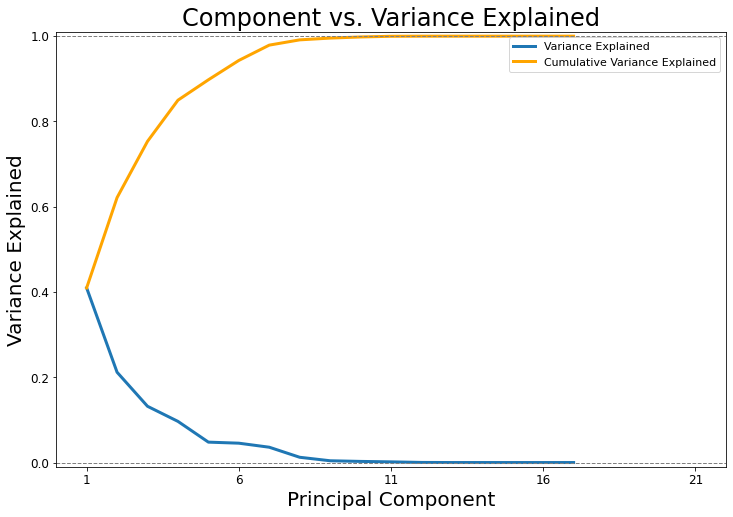

In [54]:
# Set figure size.
plt.figure(figsize=(12,8))

# Plot the explained variance.
plt.plot(range(len(var_exp)), var_exp, lw=3, label = 'Variance Explained')

# Plot the cumulative explained variance.
plt.plot(range(len(var_exp)), cum_var_exp, lw=3, color = 'orange', label = 'Cumulative Variance Explained')

# Add horizontal lines at y=0 and y=1.
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the limits of the axes.
plt.xlim([-1,21])
plt.ylim([-0.01,1.01])

# Label the axes.
plt.ylabel('Variance Explained', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)

# Make the tick labels bigger
plt.xticks(range(0, 21, 5), range(1, 22, 5), fontsize=12)
plt.yticks(fontsize=12)
    
# Add title and legend.
plt.title('Component vs. Variance Explained', fontsize=24)
plt.legend(fontsize=11);

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [66]:
pipe = make_pipeline(PCA(), KMeans())

In [67]:
params = {'pca__n_components': [2,3,4,5,6,7,8,9,10],
         'kmeans__n_clusters': [2,3,4,5,6,7,8]}

In [68]:
grid = GridSearchCV(pipe, param_grid=params,)

In [69]:
grid.fit(X_sc)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()), ('kmeans', KMeans())]),
             param_grid={'kmeans__n_clusters': [2, 3, 4, 5, 6, 7, 8],
                         'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [119]:
grid.best_params_

{'kmeans__n_clusters': 8, 'pca__n_components': 2}

In [120]:
grid.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=2)), ('kmeans', KMeans())])

In [72]:
pca2 = PCA(n_components=2)

In [73]:
kmeans2 = KMeans(n_clusters=8)

In [74]:
pca2.fit(X_sc)
Z2 = pca2.transform(X_sc)

In [91]:
pd.DataFrame(Z2).describe()

,0,1
count,5.800000e+01,5.800000e+01
mean,7.656711e-18,-2.201304e-17
std,2.582357e+00,1.857027e+00
min,-3.092289e+00,-7.697750e+00
25%,-1.447342e+00,-4.746597e-01
50%,-6.965562e-01,1.347617e-01
75%,8.857448e-01,6.709517e-01
max,1.019761e+01,9.193848e+00


In [122]:
grid.best_estimator_.named_steps['pca'].components_

array([[-3.06409720e-01,  2.87467405e-01,  2.72502160e-01,
         2.62686091e-01, -0.00000000e+00,  2.72700976e-01,
         2.99254250e-01,  1.38250520e-01,  2.55702466e-01,
         3.20448867e-01,  2.99263983e-01,  2.97303307e-01,
         1.23126669e-01,  6.38849424e-02,  7.52301991e-02,
         2.53029834e-01,  2.49474393e-01],
       [ 4.12396084e-02, -6.64235143e-02,  3.59006325e-01,
         3.60364058e-01,  2.22044605e-16,  3.58909596e-01,
        -2.29212634e-01, -1.04813052e-01,  3.69821255e-01,
        -2.45127666e-01, -2.29196548e-01, -2.27724616e-01,
         2.44806417e-01,  1.53460083e-01,  2.38112861e-01,
        -2.24781445e-01, -2.25498574e-01]])

In [123]:
grid.best_estimator_.named_steps['pca'].explained_variance_ratio_

array([0.40959949, 0.21181826])

In [75]:
kmeans2.fit(Z2)

KMeans()

In [76]:
score2 = silhouette_score(Z2, kmeans2.labels_)
print(f'StandardScaler silhouette score: {score2} ')
print(f'{kmeans2.labels_}')

StandardScaler silhouette score: 0.40730974801576636 
[4 0 4 4 4 4 4 0 0 3 4 0 5 1 1 1 4 4 2 6 6 4 4 6 0 6 6 4 0 3 4 0 7 4 6 7 3
 4 6 4 4 6 4 4 0 0 0 4 4 6 4 0 0 3 0 6 4 4]


In [77]:
X2 = X.copy()

In [78]:
X2['labels'] = kmeans2.labels_

In [80]:
cfe2 = cfe.copy()

In [81]:
cfe2['labels'] = kmeans2.labels_

In [82]:
cfe2

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recoverd,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_capita,covid_confirmed_per_capita,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,labels
0,6001.0,Alameda,California,2020-10-17 04:24:12,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,0.000263,0.013407,0.013145,3,0,4,0,0,4
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,0.002657,0.002657,0,0,0,0,0,0
2,6005.0,Amador,California,2020-10-17 04:24:12,38.445831,-120.656960,309,16,0,293.0,777.319380,5.177994,39752,0.000402,0.007773,0.007371,2,0,2,0,0,4
3,6007.0,Butte,California,2020-10-17 04:24:12,39.667278,-121.600525,3000,50,0,2950.0,1368.700556,1.666667,219186,0.000228,0.013687,0.013459,9,1,11,0,0,4
4,6009.0,Calaveras,California,2020-10-17 04:24:12,38.205371,-120.552913,331,16,0,315.0,721.054351,4.833837,45905,0.000349,0.007211,0.006862,3,0,3,0,0,4
5,6011.0,Colusa,California,2020-10-17 04:24:12,39.178820,-122.233173,545,6,0,539.0,2529.354434,1.100917,21547,0.000278,0.025294,0.025015,4,1,10,0,0,4
6,6013.0,Contra Costa,California,2020-10-17 04:24:12,37.919235,-121.928953,17945,234,0,17711.0,1555.664979,1.303984,1153526,0.000203,0.015557,0.015354,5,0,6,0,0,4
7,6015.0,Del Norte,California,2020-10-17 04:24:12,41.742283,-123.897406,173,1,0,172.0,622.033655,0.578035,27812,0.000036,0.006220,0.006184,0,0,0,0,0,0
8,6017.0,El Dorado,California,2020-10-17 04:24:12,38.779660,-120.523317,1271,4,0,1267.0,659.085370,0.314713,192843,0.000021,0.006591,0.006570,3,1,4,0,0,0
9,6019.0,Fresno,California,2020-10-17 04:24:12,36.757339,-119.646695,29727,429,0,29298.0,2975.374862,1.443133,999101,0.000429,0.029754,0.029324,5,2,8,2,2,3


In [86]:
cfe2.loc[cfe2['labels']==0]

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recoverd,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_capita,covid_confirmed_per_capita,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,labels
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,0.002657,0.002657,0,0,0,0,0,0
7,6015.0,Del Norte,California,2020-10-17 04:24:12,41.742283,-123.897406,173,1,0,172.0,622.033655,0.578035,27812,0.000036,0.006220,0.006184,0,0,0,0,0,0
8,6017.0,El Dorado,California,2020-10-17 04:24:12,38.779660,-120.523317,1271,4,0,1267.0,659.085370,0.314713,192843,0.000021,0.006591,0.006570,3,1,4,0,0,0
11,6023.0,Humboldt,California,2020-10-17 04:24:12,40.699230,-123.876044,544,8,0,536.0,401.304239,1.470588,135558,0.000059,0.004013,0.003954,4,2,11,11,13,0
24,6049.0,Modoc,California,2020-10-17 04:24:12,41.589656,-120.724482,27,0,0,27.0,305.395317,0.000000,8841,0.000000,0.003054,0.003054,0,0,0,0,0,0
28,6057.0,Nevada,California,2020-10-17 04:24:12,39.303948,-120.762728,579,8,0,571.0,580.422034,1.381693,99755,0.000080,0.005804,0.005724,1,0,1,0,0,0
31,6063.0,Plumas,California,2020-10-17 04:24:12,40.003560,-120.839524,53,0,0,53.0,281.809964,0.000000,18807,0.000000,0.002818,0.002818,2,1,4,0,0,0
44,6089.0,Shasta,California,2020-10-17 04:24:12,40.763914,-122.039688,1666,29,0,1637.0,925.144380,1.740696,180080,0.000161,0.009251,0.009090,3,0,3,0,0,0
45,6091.0,Sierra,California,2020-10-17 04:24:12,39.577135,-120.520070,6,0,0,6.0,199.667221,0.000000,3005,0.000000,0.001997,0.001997,2,0,2,1,1,0
46,6093.0,Siskiyou,California,2020-10-17 04:24:12,41.591989,-122.540743,183,0,0,183.0,420.312823,0.000000,43539,0.000000,0.004203,0.004203,5,1,6,0,0,0


In [154]:
cfe2.columns

Index(['fips', 'county', 'province_state', 'covid_last_update',
       'county_latitude', 'county_longitudue', 'covid_confirmed',
       'covid_death', 'covid_recoverd', 'covid_active', 'covid_indidence_rate',
       'covid_case_fatality_ratio', 'county_population',
       'covid_death_per_capita', 'covid_confirmed_per_capita',
       'covid_active_cases_per_capita', 'fires_per_county_in_2020',
       'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score', 'labels'],
      dtype='object')

In [155]:
cfe2.groupby('labels')['covid_confirmed',
       'covid_death','covid_active', 'covid_indidence_rate',
       'covid_case_fatality_ratio','covid_death_per_capita', 'covid_confirmed_per_capita',
       'covid_active_cases_per_capita', 'fires_per_county_in_2020',
       'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score'].mean()

<ipython-input-155-b352629c8bf6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cfe2.groupby('labels')['covid_confirmed',


,covid_confirmed,covid_death,covid_active,covid_indidence_rate,covid_case_fatality_ratio,covid_death_per_capita,covid_confirmed_per_capita,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score
labels,,,,,,,,,,,,,
0,422.692308,4.769231,417.923077,491.312754,0.632846,0.000043,0.004913,0.004871,2.307692,0.538462,4.076923,0.923077,1.076923
1,13856.333333,168.000000,13688.333333,3391.136053,3.128412,0.000608,0.033911,0.033303,2.333333,0.000000,2.333333,14.000000,14.666667
2,287222.000000,6855.000000,280367.000000,2861.031365,2.386656,0.000683,0.028610,0.027927,9.000000,1.000000,10.000000,9.000000,9.000000
3,38791.750000,742.250000,38049.500000,2492.586511,1.798608,0.000429,0.024926,0.024497,4.000000,1.250000,5.500000,2.500000,2.500000
4,6310.666667,97.041667,6209.083333,1416.345091,1.628698,0.000193,0.014166,0.013970,4.416667,0.375000,6.000000,0.750000,0.750000
5,12410.000000,335.000000,12075.000000,6848.218966,2.699436,0.001849,0.068482,0.066634,1.000000,0.000000,1.000000,49.000000,50.000000
6,9518.700000,159.800000,9358.900000,2470.915245,1.478089,0.000384,0.024709,0.024325,3.000000,0.300000,3.600000,3.200000,3.300000
7,61373.500000,1129.000000,60244.500000,2644.546615,1.834233,0.000484,0.026445,0.025962,12.000000,2.000000,14.000000,13.000000,13.000000


In [167]:
cfe2.groupby('labels')['covid_confirmed',
       'covid_death','covid_active', 'covid_indidence_rate',
       'covid_case_fatality_ratio','covid_death_per_capita', 'covid_confirmed_per_capita',
       'covid_active_cases_per_capita', 'fires_per_county_in_2020',
       'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score'].describe()

<ipython-input-167-5bb7b340904e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cfe2.groupby('labels')['covid_confirmed',


covid_confirmed                                                    \
                 count           mean           std       min        25%   
labels                                                                     
0                 13.0     422.692308    528.637618       3.0      27.00   
1                  3.0   13856.333333  17235.323621     210.0    4172.00   
2                  1.0  287222.000000           NaN  287222.0  287222.00   
3                  4.0   38791.750000  18612.798202   17072.0   26563.25   
4                 24.0    6310.666667   7866.195642      78.0     724.50   
5                  1.0   12410.000000           NaN   12410.0   12410.00   
6                 10.0    9518.700000   6629.470970     174.0    5368.50   
7                  2.0   61373.500000   2701.855011   59463.0   60418.25   

                                      covid_death                           \
             50%        75%       max       count         mean         std   
labels                                                                       
0          183.0     579.00    1666.0        13.0     4.769231    8.012010   
1         8134.0   20679.50   33225.0         3.0   168.000000  208.899497   
2       287222.0  287222.00  287222.0         1.0  6855.000000         NaN   
3        40754.0   52982.50   56587.0         4.0   742.250000  505.438011   
4         2835.0    9209.50   24102.0        24.0    97.041667  140.085526   
5        12410.0   12410.00   12410.0         1.0   335.000000         NaN   
6         9421.0   13034.25   21138.0        10.0   159.800000  156.612615   
7        61373.5   62328.75   63284.0         2.0  1129.000000  197.989899   

                                                 covid_active                 \
           min      25%     50%      75%     max        count           mean   
labels                                                                         
0          0.0     0.00     1.0     8.00    29.0         13.0     417.923077   
1         15.0    49.00    83.0   244.50   406.0          3.0   13688.333333   
2       6855.0  6855.00  6855.0  6855.00  6855.0          1.0  280367.000000   
3        274.0   390.25   647.0   999.00  1401.0          4.0   38049.500000   
4          1.0    13.50    27.5   129.50   464.0         24.0    6209.083333   
5        335.0   335.00   335.0   335.00   335.0          1.0   12075.000000   
6          2.0    75.25   121.0   157.25   483.0         10.0    9358.900000   
7        989.0  1059.00  1129.0  1199.00  1269.0          2.0   60244.500000   

                                                                          \
                 std       min        25%       50%        75%       max   
labels                                                                     
0         521.855577       3.0      27.00     183.0     571.00    1637.0   
1       17026.919549     195.0    4123.00    8051.0   20435.00   32819.0   
2                NaN  280367.0  280367.00  280367.0  280367.00  280367.0   
3       18142.229365   16798.0   26173.00   40107.0   51983.50   55186.0   
4        7719.281651      76.0     722.00    2798.5    9073.50   23638.0   
5                NaN   12075.0   12075.00   12075.0   12075.00   12075.0   
6        6485.990997     172.0    5282.75    9286.0   12894.50   20655.0   
7        2503.865112   58474.0   59359.25   60244.5   61129.75   62015.0   

       covid_indidence_rate  ... active_fires_per_county fire_score  \
                      count  ...                     max      count   
labels                       ...                                      
0                      13.0  ...                     2.0       13.0   
1                       3.0  ...                     0.0        3.0   
2                       1.0  ...                     1.0        1.0   
3                       4.0  ...                     3.0        4.0   
4                      24.0  ...                     2.0       24.0   
5                       1

In [131]:
combined_risk = pd.read_csv('../data/combined_risk_added.csv').iloc[:,1:]
combined_risk

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_10000,covid_confirmed_per_10000,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2
0,6001.0,Alameda,California,2020-10-17 04:24:12,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,2.626652,134.072944,131.446292,3,0,4,0,0,0.011722,-1.0,-1.0
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,26.572188,26.572188,0,0,0,0,0,0.000000,-3.0,-2.0
2,6005.0,Amador,California,2020-10-17 04:24:12,38.445831,-120.656960,309,16,0,293.0,777.319380,5.177994,39752,4.024955,77.731938,73.706983,2,0,2,0,0,1.302574,-2.0,1.0
3,6007.0,Butte,California,2020-10-17 04:24:12,39.667278,-121.600525,3000,50,0,2950.0,1368.700556,1.666667,219186,2.281168,136.870056,134.588888,9,1,10,0,0,0.076039,0.0,0.0
4,6009.0,Calaveras,California,2020-10-17 04:24:12,38.205371,-120.552913,331,16,0,315.0,721.054351,4.833837,45905,3.485459,72.105435,68.619976,3,0,3,0,0,1.053009,-2.0,1.0
5,6011.0,Colusa,California,2020-10-17 04:24:12,39.178820,-122.233173,545,6,0,539.0,2529.354434,1.100917,21547,2.784610,252.935443,250.150833,4,1,10,0,0,0.510938,1.0,1.0
6,6013.0,Contra Costa,California,2020-10-17 04:24:12,37.919235,-121.928953,17945,234,0,17711.0,1555.664979,1.303984,1153526,2.028563,155.566498,153.537935,5,0,6,0,0,0.011304,-0.0,-1.0
7,6015.0,Del Norte,California,2020-10-17 04:24:12,41.742283,-123.897406,173,1,0,172.0,622.033655,0.578035,27812,0.359557,62.203365,61.843808,0,0,0,0,0,0.207836,-3.0,-2.0
8,6017.0,El Dorado,California,2020-10-17 04:24:12,38.779660,-120.523317,1271,4,0,1267.0,659.085370,0.314713,192843,0.207423,65.908537,65.701114,3,1,4,0,0,0.016320,-2.0,-1.0
9,6019.0,Fresno,California,2020-10-17 04:24:12,36.757339,-119.646695,29727,429,0,29298.0,2975.374862,1.443133,999101,4.293860,297.537486,293.243626,5,2,8,2,2,0.014444,1.0,0.0


In [160]:
combined_risk['labels'] = kmeans2.labels_

In [161]:
combined_risk.sort_values(by = 'labels')

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_10000,covid_confirmed_per_10000,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2,labels
0,6001.0,Alameda,California,2020-10-17 04:24:12,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,2.626652,134.072944,131.446292,3,0,4,0,0,0.011722,-1.0,-1.0,0
36,6073.0,San Diego,California,2020-10-17 04:24:12,33.034846,-116.736533,51781,865,0,50916.0,1551.104894,1.670497,3338330,2.591116,155.110489,152.519373,5,0,5,5,5,0.005004,-0.0,-0.0,0
29,6059.0,Orange,California,2020-10-17 04:24:12,33.701475,-117.764600,56587,1401,0,55186.0,1781.879351,2.475834,3175692,4.411637,178.187935,173.776298,0,0,0,3,3,0.007796,-1.0,-2.0,0
39,6079.0,San Luis Obispo,California,2020-10-17 04:24:12,35.388220,-120.403903,3969,32,0,3937.0,1401.923627,0.806248,283111,1.130299,140.192363,139.062064,14,0,14,0,0,0.028478,1.0,1.0,0
22,6045.0,Mendocino,California,2020-10-17 04:24:12,39.438119,-123.391131,1077,21,0,1056.0,1241.512870,1.949861,86749,2.420777,124.151287,121.730510,8,1,14,9,9,0.224770,2.0,3.0,0
17,6035.0,Lassen,California,2020-10-17 04:24:12,40.673113,-120.593510,752,1,0,751.0,2459.686652,0.132979,30573,0.327086,245.968665,245.641579,10,0,10,0,0,0.043495,1.0,0.0,0
10,6021.0,Glenn,California,2020-10-17 04:24:12,39.598759,-122.393845,638,3,0,635.0,2247.032719,0.470219,28393,1.056598,224.703272,223.646673,6,1,12,0,0,0.165611,2.0,1.0,0
42,6085.0,Santa Clara,California,2020-10-17 04:24:12,37.231049,-121.697046,22974,373,0,22492.0,1185.723800,1.623574,1927852,1.934796,119.168899,116.668707,6,0,7,4,4,0.008422,0.0,0.0,0
33,6067.0,Sacramento,California,2020-10-17 04:24:12,38.451068,-121.342537,24102,464,0,23638.0,1552.905884,1.925151,1552058,2.989579,155.290588,152.301009,5,0,5,0,0,0.012404,-1.0,-1.0,0
6,6013.0,Contra Costa,California,2020-10-17 04:24:12,37.919235,-121.928953,17945,234,0,17711.0,1555.664979,1.303984,1153526,2.028563,155.566498,153.537935,5,0,6,0,0,0.011304,-0.0,-1.0,0


In [132]:
X_comb = combined_risk.iloc[:,4:]
X_comb.head()

,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_10000,covid_confirmed_per_10000,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2
0,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,2.626652,134.072944,131.446292,3,0,4,0,0,0.011722,-1.0,-1.0
1,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,26.572188,26.572188,0,0,0,0,0,0.000000,-3.0,-2.0
2,38.445831,-120.656960,309,16,0,293.0,777.319380,5.177994,39752,4.024955,77.731938,73.706983,2,0,2,0,0,1.302574,-2.0,1.0
3,39.667278,-121.600525,3000,50,0,2950.0,1368.700556,1.666667,219186,2.281168,136.870056,134.588888,9,1,10,0,0,0.076039,0.0,0.0
4,38.205371,-120.552913,331,16,0,315.0,721.054351,4.833837,45905,3.485459,72.105435,68.619976,3,0,3,0,0,1.053009,-2.0,1.0


In [135]:
X_comb_sc = ss.fit_transform(X_comb)

In [139]:
params_comb = {'pca__n_components': [2,3,4,5],
         'kmeans__n_clusters': [2,3,4,5,6,7,8,9,10]}

In [140]:
pipe_comb = make_pipeline(PCA(), KMeans())
grid_comb = GridSearchCV(pipe_comb, param_grid = params_comb)

In [141]:
grid_comb.fit(X_comb_sc)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()), ('kmeans', KMeans())]),
             param_grid={'kmeans__n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'pca__n_components': [2, 3, 4, 5]})

In [142]:
grid_comb.best_params_

{'kmeans__n_clusters': 10, 'pca__n_components': 2}

In [143]:
pca_comb = PCA(n_components=2)

In [144]:
kmeans_comb = KMeans(n_clusters=10)

In [145]:
pca_comb.fit(X_comb_sc)
Z_comb = pca_comb.transform(X_comb_sc)

In [146]:
pd.DataFrame(Z_comb).describe()

,0,1
count,5.800000e+01,5.800000e+01
mean,-1.531342e-17,4.163336e-17
std,2.765267e+00,1.914564e+00
min,-3.583875e+00,-6.605522e+00
25%,-1.596414e+00,-4.684737e-01
50%,-6.278272e-01,1.160927e-01
75%,8.436923e-01,4.678127e-01
max,1.096866e+01,9.921578e+00


In [147]:
grid.best_estimator_.named_steps['pca'].components_

array([[-2.73255964e-01,  2.66300785e-01,  2.24473400e-01,
         2.15656213e-01, -4.33680869e-19,  2.24654836e-01,
         2.77837027e-01,  1.42329519e-01,  2.06165005e-01,
         3.05228952e-01,  2.77846017e-01,  2.75843061e-01,
         1.34529064e-01,  8.24539188e-02,  1.03187415e-01,
         2.65559819e-01,  2.62676560e-01,  4.23965577e-02,
         3.19747145e-01,  2.03815299e-01],
       [-2.21271899e-02, -4.39602692e-02,  3.82747004e-01,
         3.79625353e-01, -0.00000000e+00,  3.82756720e-01,
        -1.08848445e-01, -1.79355312e-01,  3.93884242e-01,
        -1.85947256e-01, -1.08831526e-01, -1.06494810e-01,
         1.93745483e-01,  8.95748595e-02,  1.62177766e-01,
        -2.41986667e-01, -2.44224679e-01, -2.61732524e-01,
        -8.97240042e-02, -1.92149460e-01]])

In [148]:
kmeans_comb.fit(Z_comb)

KMeans(n_clusters=10)

In [149]:
score_comb = silhouette_score(Z_comb, kmeans_comb.labels_)
print(f'StandardScaler silhouette score: {score_comb} ')
print(f'{kmeans_comb.labels_}')

StandardScaler silhouette score: 0.39445696373302536 
[5 1 7 5 7 7 5 1 1 9 5 7 3 6 4 4 7 5 2 0 7 7 0 0 1 0 0 1 1 9 1 1 8 5 7 8 9
 1 0 5 1 7 5 1 1 1 1 5 5 0 1 5 1 4 1 5 7 1]


In [153]:
combined_risk2 = combined_risk.copy()
combined_risk2['labels'] = kmeans_comb.labels_
combined_risk2.sort_values(by='combined_risk')

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_10000,covid_confirmed_per_10000,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2,labels
24,6049.0,Modoc,California,2020-10-17 04:24:12,41.589656,-120.724482,27,0,0,27.0,305.395317,0.000000,8841,0.000000,30.539532,30.539532,0,0,0,0,0,0.000000,-3.0,-2.0,1
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,26.572188,26.572188,0,0,0,0,0,0.000000,-3.0,-2.0,1
7,6015.0,Del Norte,California,2020-10-17 04:24:12,41.742283,-123.897406,173,1,0,172.0,622.033655,0.578035,27812,0.359557,62.203365,61.843808,0,0,0,0,0,0.207836,-3.0,-2.0,1
31,6063.0,Plumas,California,2020-10-17 04:24:12,40.003560,-120.839524,53,0,0,53.0,281.809964,0.000000,18807,0.000000,28.180996,28.180996,2,1,3,0,0,0.000000,-2.0,-1.0,1
37,6075.0,San Francisco,California,2020-10-17 04:24:12,37.752151,-122.438567,11808,131,0,11677.0,1339.460427,1.109417,881549,1.486021,133.946043,132.460022,0,0,0,0,0,0.012585,-2.0,-2.0,1
40,6081.0,San Mateo,California,2020-10-17 04:24:12,37.422881,-122.327555,10687,157,0,10530.0,1394.126848,1.469075,766573,2.048076,139.412685,137.364608,1,0,1,0,0,0.019164,-2.0,-2.0,1
43,6087.0,Santa Cruz,California,2020-10-17 04:24:12,37.055803,-122.006652,2670,23,0,2647.0,977.259501,0.861423,273213,0.841834,97.725950,96.884116,1,0,1,0,0,0.031529,-2.0,-2.0,1
45,6091.0,Sierra,California,2020-10-17 04:24:12,39.577135,-120.520070,6,0,0,6.0,199.667221,0.000000,3005,0.000000,19.966722,19.966722,2,0,2,1,1,0.000000,-2.0,-1.0,1
50,6101.0,Sutter,California,2020-10-17 04:24:12,39.034175,-121.694590,1793,12,0,1781.0,1849.006404,0.669269,96971,1.237483,184.900640,183.663157,0,0,0,0,0,0.069017,-2.0,-2.0,1
28,6057.0,Nevada,California,2020-10-17 04:24:12,39.303948,-120.762728,579,8,0,571.0,580.422034,1.381693,99755,0.801965,58.042203,57.240239,1,0,1,0,0,0.138509,-2.0,-2.0,1


In [162]:
combined_risk.columns

Index(['fips', 'county', 'province_state', 'covid_last_update',
       'county_latitude', 'county_longitudue', 'covid_confirmed',
       'covid_death', 'covid_recovered', 'covid_active',
       'covid_indidence_rate', 'covid_case_fatality_ratio',
       'county_population', 'covid_death_per_10000',
       'covid_confirmed_per_10000', 'covid_active_cases_per_capita',
       'fires_per_county_in_2020', 'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score',
       'fatality_rate_per_10000', 'combined_risk', 'combined_risk_2',
       'labels'],
      dtype='object')

In [164]:
combined_risk.groupby('labels')['covid_confirmed',
       'covid_death','covid_active', 'covid_indidence_rate',
       'covid_case_fatality_ratio',
       'covid_active_cases_per_capita', 'fires_per_county_in_2020',
       'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score', 'fatality_rate_per_10000', 'combined_risk', 'combined_risk_2'].mean()

<ipython-input-164-92b9a16a2b77>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combined_risk.groupby('labels')['covid_confirmed',


,covid_confirmed,covid_death,covid_active,covid_indidence_rate,covid_case_fatality_ratio,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2
labels,,,,,,,,,,,,,,
0,18657.545455,353.000000,18294.636364,1607.896798,1.453103,158.629030,6.454545,0.272727,7.909091,1.909091,1.909091,0.054095,0.272727,0.000000
1,12410.000000,335.000000,12075.000000,6848.218966,2.699436,666.335568,1.000000,0.000000,1.000000,49.000000,50.000000,0.148963,9.000000,4.000000
2,287222.000000,6855.000000,280367.000000,2861.031365,2.386656,279.274840,9.000000,1.000000,10.000000,9.000000,9.000000,0.002377,3.000000,1.000000
3,11788.100000,202.900000,11585.200000,2785.080688,2.152721,273.357767,3.500000,0.800000,5.200000,3.400000,3.500000,0.483167,0.700000,0.300000
4,4162.842105,53.631579,4109.210526,1332.079723,1.662277,131.291271,2.736842,0.368421,4.157895,2.210526,2.368421,0.236547,-0.789474,-0.315789
5,20679.500000,244.500000,20435.000000,4504.631902,1.121190,445.494658,3.500000,0.000000,3.500000,8.000000,8.500000,0.040147,2.000000,-0.500000
6,61373.500000,1129.000000,60244.500000,2644.546615,1.834233,259.618143,12.000000,2.000000,14.000000,13.000000,13.000000,0.007873,3.500000,2.500000
7,442.250000,3.500000,438.750000,447.983703,0.611609,44.456070,2.000000,0.500000,2.916667,0.083333,0.083333,0.182134,-2.000000,-1.083333


In [159]:
combined_risk2.groupby('labels')['covid_confirmed',
       'covid_death','covid_active', 'covid_indidence_rate',
       'covid_case_fatality_ratio',
       'covid_active_cases_per_capita', 'fires_per_county_in_2020',
       'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score', 'fatality_rate_per_10000', 'combined_risk', 'combined_risk_2'].mean()

<ipython-input-159-3e9200c4c291>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combined_risk2.groupby('labels')['covid_confirmed',


,covid_confirmed,covid_death,covid_active,covid_indidence_rate,covid_case_fatality_ratio,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2
labels,,,,,,,,,,,,,,
0,9230.285714,172.000000,9058.285714,2467.818316,1.650650,242.603769,4.428571,0.571429,6.142857,5.428571,5.571429,0.180566,1.000000,0.285714
1,2119.500000,24.722222,2094.777778,795.852065,0.703693,78.867429,1.888889,0.277778,2.500000,0.055556,0.055556,0.060188,-1.888889,-1.388889
2,287222.000000,6855.000000,280367.000000,2861.031365,2.386656,279.274840,9.000000,1.000000,10.000000,9.000000,9.000000,0.002377,3.000000,1.000000
3,12410.000000,335.000000,12075.000000,6848.218966,2.699436,666.335568,1.000000,0.000000,1.000000,49.000000,50.000000,0.148963,9.000000,4.000000
4,19477.000000,254.333333,19222.666667,4223.750247,1.282449,417.103547,4.333333,1.000000,5.333333,5.333333,5.666667,0.038240,2.000000,-0.333333
5,10499.166667,163.833333,10326.250000,1598.522111,1.223491,158.042638,6.166667,0.333333,7.750000,0.416667,0.416667,0.049498,0.083333,-0.250000
6,210.000000,15.000000,195.000000,1164.144354,7.142857,108.099119,0.000000,0.000000,0.000000,26.000000,27.000000,3.959675,1.000000,8.000000
7,2338.500000,37.400000,2301.100000,1430.616971,2.319371,140.419248,2.700000,0.600000,5.000000,1.800000,2.000000,0.514405,-0.600000,0.400000
8,61373.500000,1129.000000,60244.500000,2644.546615,1.834233,259.618143,12.000000,2.000000,14.000000,13.000000,13.000000,0.007873,3.500000,2.500000


In [173]:
params_comb2 = {'pca__n_components': [2,3,4,5],
         'kmeans__n_clusters': range(8,28)}

In [174]:
grid_comb2 = GridSearchCV(pipe_comb, param_grid = params_comb2)

In [175]:
grid_comb2.fit(X_comb_sc)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()), ('kmeans', KMeans())]),
             param_grid={'kmeans__n_clusters': range(8, 28),
                         'pca__n_components': [2, 3, 4, 5]})

In [176]:
grid_comb2.best_params_

{'kmeans__n_clusters': 27, 'pca__n_components': 2}

In [33]:
#drop
cfe['covid_recoverd'].value_counts()

0    58
Name: covid_recoverd, dtype: int64

In [37]:
X_scores = cfe[['earthquakes_score', 'fire_score', 'covid_confirmed_per_capita']]
ss_scores = StandardScaler()
X_scores_sc = ss_scores.fit_transform(X_scores)

In [36]:
for eps in linspace(.1,5,50):
    for samples in range(2,12):
        dbscan_scores = DBSCAN(eps = eps, min_samples=samples)
        dbscan_scores.fit(X_scores_sc)
        set(dbscan_scores.labels_)

{-1, 0}

In [45]:
scaled_df = pd.DataFrame(X_scores_sc, columns=['earthquakes_score', 'fire_score', 'covid_confirmed_per_capita'] )
scaled_df

,earthquakes_score,fire_score,covid_confirmed_per_capita
0,-0.414884,-0.276086,-0.310412
1,-0.414884,-1.204376,-1.171588
2,-0.414884,-0.740231,-0.761753
3,-0.414884,1.348421,-0.288004
4,-0.414884,-0.508159,-0.806826
5,-0.414884,1.116348,0.641783
6,-0.414884,0.188059,-0.138229
7,-0.414884,-1.204376,-0.886151
8,-0.414884,-0.276086,-0.856469
9,-0.178970,0.652204,0.999085


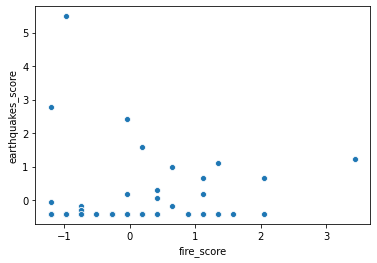

In [46]:
sns.scatterplot(scaled_df['fire_score'],scaled_df['earthquakes_score'])

In [97]:
X.columns

Index(['county_latitude', 'county_longitudue', 'covid_confirmed',
       'covid_death', 'covid_recoverd', 'covid_active', 'covid_indidence_rate',
       'covid_case_fatality_ratio', 'county_population',
       'covid_death_per_capita', 'covid_confirmed_per_capita',
       'covid_active_cases_per_capita', 'fires_per_county_in_2020',
       'active_fires_per_county', 'fire_score',
       'earthquakes_per_county_in_2020', 'earthquakes_score', 'labels'],
      dtype='object')

In [98]:
X3 = X.drop(columns = ['county_latitude', 'county_longitudue'])

In [104]:
X3_sc = ss.fit_transform(X3)

In [105]:
pipe2 = make_pipeline(PCA(), KMeans())

In [106]:
params = {'pca__n_components': [2,3,4,5,6,7,8,9,10],
         'kmeans__n_clusters': [2,3,4,5,6,7,8]}

In [107]:
grid2 = GridSearchCV(pipe2, param_grid=params,)

In [108]:
grid2.fit(X3_sc)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()), ('kmeans', KMeans())]),
             param_grid={'kmeans__n_clusters': [2, 3, 4, 5, 6, 7, 8],
                         'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [109]:
grid2.best_params_

{'kmeans__n_clusters': 8, 'pca__n_components': 2}

In [110]:
pca3 = PCA(n_components=2)

In [111]:
kmeans3 = KMeans(n_clusters=8)

In [112]:
pca3.fit(X3_sc)
Z3 = pca3.transform(X3_sc)

In [113]:
pd.DataFrame(Z3).describe()

,0,1
count,5.800000e+01,5.800000e+01
mean,5.742533e-17,6.699622e-17
std,2.401339e+00,1.858834e+00
min,-2.669383e+00,-8.036294e+00
25%,-1.190753e+00,-4.753420e-01
50%,-4.684164e-01,1.031998e-01
75%,7.386424e-01,6.518578e-01
max,1.020366e+01,9.056476e+00


In [117]:
grid.named_steps

AttributeError: 'GridSearchCV' object has no attribute 'named_steps'

In [115]:
kmeans3.fit(Z3)

KMeans()

In [76]:
score2 = silhouette_score(Z3, kmeans3.labels_)
print(f'StandardScaler silhouette score: {score2} ')
print(f'{kmeans2.labels_}')

StandardScaler silhouette score: 0.40730974801576636 
[4 0 4 4 4 4 4 0 0 3 4 0 5 1 1 1 4 4 2 6 6 4 4 6 0 6 6 4 0 3 4 0 7 4 6 7 3
 4 6 4 4 6 4 4 0 0 0 4 4 6 4 0 0 3 0 6 4 4]


In [77]:
X2 = X.copy()

In [78]:
X2['labels'] = kmeans2.labels_

In [80]:
cfe2 = cfe.copy()

In [81]:
cfe2['labels'] = kmeans2.labels_

In [82]:
cfe2

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recoverd,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_capita,covid_confirmed_per_capita,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,labels
0,6001.0,Alameda,California,2020-10-17 04:24:12,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,0.000263,0.013407,0.013145,3,0,4,0,0,4
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,0.002657,0.002657,0,0,0,0,0,0
2,6005.0,Amador,California,2020-10-17 04:24:12,38.445831,-120.656960,309,16,0,293.0,777.319380,5.177994,39752,0.000402,0.007773,0.007371,2,0,2,0,0,4
3,6007.0,Butte,California,2020-10-17 04:24:12,39.667278,-121.600525,3000,50,0,2950.0,1368.700556,1.666667,219186,0.000228,0.013687,0.013459,9,1,11,0,0,4
4,6009.0,Calaveras,California,2020-10-17 04:24:12,38.205371,-120.552913,331,16,0,315.0,721.054351,4.833837,45905,0.000349,0.007211,0.006862,3,0,3,0,0,4
5,6011.0,Colusa,California,2020-10-17 04:24:12,39.178820,-122.233173,545,6,0,539.0,2529.354434,1.100917,21547,0.000278,0.025294,0.025015,4,1,10,0,0,4
6,6013.0,Contra Costa,California,2020-10-17 04:24:12,37.919235,-121.928953,17945,234,0,17711.0,1555.664979,1.303984,1153526,0.000203,0.015557,0.015354,5,0,6,0,0,4
7,6015.0,Del Norte,California,2020-10-17 04:24:12,41.742283,-123.897406,173,1,0,172.0,622.033655,0.578035,27812,0.000036,0.006220,0.006184,0,0,0,0,0,0
8,6017.0,El Dorado,California,2020-10-17 04:24:12,38.779660,-120.523317,1271,4,0,1267.0,659.085370,0.314713,192843,0.000021,0.006591,0.006570,3,1,4,0,0,0
9,6019.0,Fresno,California,2020-10-17 04:24:12,36.757339,-119.646695,29727,429,0,29298.0,2975.374862,1.443133,999101,0.000429,0.029754,0.029324,5,2,8,2,2,3


In [177]:
combined_risk2

,fips,county,province_state,covid_last_update,county_latitude,county_longitudue,covid_confirmed,covid_death,covid_recovered,covid_active,covid_indidence_rate,covid_case_fatality_ratio,county_population,covid_death_per_10000,covid_confirmed_per_10000,covid_active_cases_per_capita,fires_per_county_in_2020,active_fires_per_county,fire_score,earthquakes_per_county_in_2020,earthquakes_score,fatality_rate_per_10000,combined_risk,combined_risk_2,labels
0,6001.0,Alameda,California,2020-10-17 04:24:12,37.646294,-121.892927,22408,439,0,21969.0,1340.729443,1.959122,1671329,2.626652,134.072944,131.446292,3,0,4,0,0,0.011722,-1.0,-1.0,5
1,6003.0,Alpine,California,2020-10-17 04:24:12,38.596786,-119.822359,3,0,0,3.0,265.721878,0.000000,1129,0.000000,26.572188,26.572188,0,0,0,0,0,0.000000,-3.0,-2.0,1
2,6005.0,Amador,California,2020-10-17 04:24:12,38.445831,-120.656960,309,16,0,293.0,777.319380,5.177994,39752,4.024955,77.731938,73.706983,2,0,2,0,0,1.302574,-2.0,1.0,7
3,6007.0,Butte,California,2020-10-17 04:24:12,39.667278,-121.600525,3000,50,0,2950.0,1368.700556,1.666667,219186,2.281168,136.870056,134.588888,9,1,10,0,0,0.076039,0.0,0.0,5
4,6009.0,Calaveras,California,2020-10-17 04:24:12,38.205371,-120.552913,331,16,0,315.0,721.054351,4.833837,45905,3.485459,72.105435,68.619976,3,0,3,0,0,1.053009,-2.0,1.0,7
5,6011.0,Colusa,California,2020-10-17 04:24:12,39.178820,-122.233173,545,6,0,539.0,2529.354434,1.100917,21547,2.784610,252.935443,250.150833,4,1,10,0,0,0.510938,1.0,1.0,7
6,6013.0,Contra Costa,California,2020-10-17 04:24:12,37.919235,-121.928953,17945,234,0,17711.0,1555.664979,1.303984,1153526,2.028563,155.566498,153.537935,5,0,6,0,0,0.011304,-0.0,-1.0,5
7,6015.0,Del Norte,California,2020-10-17 04:24:12,41.742283,-123.897406,173,1,0,172.0,622.033655,0.578035,27812,0.359557,62.203365,61.843808,0,0,0,0,0,0.207836,-3.0,-2.0,1
8,6017.0,El Dorado,California,2020-10-17 04:24:12,38.779660,-120.523317,1271,4,0,1267.0,659.085370,0.314713,192843,0.207423,65.908537,65.701114,3,1,4,0,0,0.016320,-2.0,-1.0,1
9,6019.0,Fresno,California,2020-10-17 04:24:12,36.757339,-119.646695,29727,429,0,29298.0,2975.374862,1.443133,999101,4.293860,297.537486,293.243626,5,2,8,2,2,0.014444,1.0,0.0,9


In [178]:
combined_risk2.to_csv('../data/combined_risk_labels.csv', index=False)